## Scraping Tweets and Cleaning Data

In [1]:
# Imports
import tweepy
from textblob import TextBlob

### My Twitter API Authentication Variables

In [2]:
API_key = ' '
API_key_secret = ' '

In [3]:
access_token = ' '
access_token_secret = ' '

In [4]:
auth = tweepy.OAuthHandler(API_key, API_key_secret)
auth.set_access_token(access_token, access_token_secret)

### API

In [5]:
api = tweepy.API(auth)

### Scraping Tweets

In [6]:
count = 100
tweets = api.search(q='dollar',count=count)

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list = []
positive_list = []
negative_list = []
neutral_list = []

In [10]:
for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

In [11]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [12]:
positive = percentage(positive, count)
negative = percentage(negative, count)
neutral = percentage(neutral, count)
polarity = percentage(polarity, count)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

### Data Manipulation

In [3]:
import numpy as np
import pandas as pd

In [14]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('Total number: ',len(tweet_list))
print('Positive number: ',len(positive_list))
print('Negative number: ', len(negative_list))
print('Neutral number: ',len(neutral_list))

total number:  100
positive number:  40
negative number:  30
neutral number:  30


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Creating a new DataFrame

In [16]:
# Removing the duplicates
tweet_list.drop_duplicates(inplace = True)

In [20]:
data = pd.DataFrame(tweet_list)

In [21]:
data.head()

,0
0,RT @AjepArts: The amount of people in my menti...
1,RT @5555academy: $CBBT x PKG 💎\n\n$SAVA went f...
2,A two dollar joint is still a good deal. $sndl
3,RT @DonKwahn: I hate that dollar and a dream f...
4,RT @BabyNeedABottle: @JohnFetterman TEN TRILLI...


In [26]:
data['text'] = data[0]

### Cleaning the Texts

In [27]:
import re
import string

In [28]:
stopwords = nltk.corpus.stopwords.words('english')

In [29]:
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',x)
data['text'] = data.text.map(remove_rt).map(rt)
data['text'] = data.text.str.lower()

In [30]:
data.head()

,0,text
0,RT @AjepArts: The amount of people in my menti...,the amount of people in my mentions trying so...
1,RT @5555academy: $CBBT x PKG 💎\n\n$SAVA went f...,cbbt x pkg sava went from 1 63 to 65 o...
2,A two dollar joint is still a good deal. $sndl,a two dollar joint is still a good deal sndl
3,RT @DonKwahn: I hate that dollar and a dream f...,i hate that dollar and a dream fairytale ass ...
4,RT @BabyNeedABottle: @JohnFetterman TEN TRILLI...,ten trillion dollar reward for proof of big...


In [31]:
# Creating the polarity and subjectivity columns, which are the values that the TextBlob returns 
data[['polarity', 'subjectivity']] = data['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [32]:
# Checking the head
data.head()

,0,text,polarity,subjectivity
0,RT @AjepArts: The amount of people in my menti...,the amount of people in my mentions trying so...,-0.095833,0.470833
1,RT @5555academy: $CBBT x PKG 💎\n\n$SAVA went f...,cbbt x pkg sava went from 1 63 to 65 o...,0.000000,0.000000
2,A two dollar joint is still a good deal. $sndl,a two dollar joint is still a good deal sndl,0.700000,0.600000
3,RT @DonKwahn: I hate that dollar and a dream f...,i hate that dollar and a dream fairytale ass ...,-0.150000,0.787500
4,RT @BabyNeedABottle: @JohnFetterman TEN TRILLI...,ten trillion dollar reward for proof of big...,0.000000,0.050000


In [33]:
for index, row in data['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        data.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        data.loc[index, 'sentiment'] = "positive"
    else:
        data.loc[index, 'sentiment'] = "neutral"
    data.loc[index, 'neg'] = neg
    data.loc[index, 'neu'] = neu
    data.loc[index, 'pos'] = pos
    data.loc[index, 'compound'] = comp

In [34]:
data.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @AjepArts: The amount of people in my menti...,the amount of people in my mentions trying so...,-0.095833,0.470833,negative,0.085,0.915,0.000,-0.2183
1,RT @5555academy: $CBBT x PKG 💎\n\n$SAVA went f...,cbbt x pkg sava went from 1 63 to 65 o...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,A two dollar joint is still a good deal. $sndl,a two dollar joint is still a good deal sndl,0.700000,0.600000,positive,0.000,0.707,0.293,0.4404
3,RT @DonKwahn: I hate that dollar and a dream f...,i hate that dollar and a dream fairytale ass ...,-0.150000,0.787500,negative,0.380,0.409,0.211,-0.7783
4,RT @BabyNeedABottle: @JohnFetterman TEN TRILLI...,ten trillion dollar reward for proof of big...,0.000000,0.050000,negative,0.382,0.462,0.155,-0.6597


### Saving the df

In [35]:
compression_opts = dict(method='zip',
                       archive_name='twitter.csv')  
data.to_csv('twitter.zip', index=False,
           compression=compression_opts)  

## Loading the New Data

In [ ]:
# Summary:

# text: it's the tweet after it's cleaned

# polarity: score ranging from -1 to 1

# subjectivity: score ranging from -1 to 1

# sentiment: positive / negative or neutral

# neg: negative scores

# neu: neutral scores

# pos: positive scores

# compound: normalized score (intensity) 

In [4]:
twitter_df = pd.read_csv('twitter.csv')

In [8]:
del twitter_df['0']

In [9]:
twitter_df.head()

,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,the amount of people in my mentions trying so...,-0.095833,0.470833,negative,0.085,0.915,0.000,-0.2183
1,cbbt x pkg sava went from 1 63 to 65 o...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,a two dollar joint is still a good deal sndl,0.700000,0.600000,positive,0.000,0.707,0.293,0.4404
3,i hate that dollar and a dream fairytale ass ...,-0.150000,0.787500,negative,0.380,0.409,0.211,-0.7783
4,ten trillion dollar reward for proof of big...,0.000000,0.050000,negative,0.382,0.462,0.155,-0.6597


In [10]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          87 non-null     object 
 1   polarity      87 non-null     float64
 2   subjectivity  87 non-null     float64
 3   sentiment     87 non-null     object 
 4   neg           87 non-null     float64
 5   neu           87 non-null     float64
 6   pos           87 non-null     float64
 7   compound      87 non-null     float64
dtypes: float64(6), object(2)
memory usage: 5.6+ KB


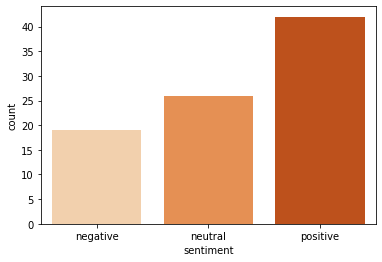

In [13]:
# Countplot
sns.countplot(x='sentiment', data=twitter_df, palette='Oranges')